**IMPORTING ALL THE LIBRARIES**

In [130]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

**IMPORTING THE DATASET AND PREPROCESSING IT**

In [131]:
print("##Reading the dataset from CVS file##")
df=pd.read_csv("spambase.csv")
df

##Reading the dataset from CVS file##


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [132]:
print("##Describing the dataset##")
df.describe()

##Describing the dataset##


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [133]:
print("##Displaying the dimension of the dataset##")
df.shape

##Displaying the dimension of the dataset##


(4601, 58)

In [134]:
print("##Displaying values of all the cells in the CSV FILE##")
df.values

##Displaying values of all the cells in the CSV FILE##


array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 6.100e+01, 2.780e+02,
        1.000e+00],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 1.010e+02, 1.028e+03,
        1.000e+00],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 4.850e+02, 2.259e+03,
        1.000e+00],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 6.000e+00, 1.180e+02,
        0.000e+00],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 5.000e+00, 7.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 5.000e+00, 4.000e+01,
        0.000e+00]])

In [135]:
print("##Displaying the features##")
X=df.drop(['class'],axis=1)
X

##Displaying the features##


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [136]:
print("##Displaying the target feature##")
Y=df['class']
Y

##Displaying the target feature##


0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

SPLITTING THE DATASET INTO TRAINING AND TESTING DATASETS

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

**RANDOM FOREST CLASSIFIER**

In [138]:
model_1=RandomForestClassifier(n_estimators=1000,criterion="entropy",max_depth=10)
model_1.fit(X_train,Y_train)
Y_pred1=model_1.predict(X_test)

 *ACCURACY, CONFUSION MATRIX, PRECISION, RECALL FOR RANDOM FOREST ALGORITHM*

In [139]:
accuracy1=accuracy_score(Y_test, Y_pred1)
print("The accuracy of the random forest model is:",accuracy1)

The accuracy of the random forest model is: 0.9457111834961998


In [140]:
confusion_matrix1=confusion_matrix(Y_test, Y_pred1)
print("Displaying confusion matrix for random forest model:\n",confusion_matrix1)

Displaying confusion matrix for random forest model:
 [[515  13]
 [ 37 356]]


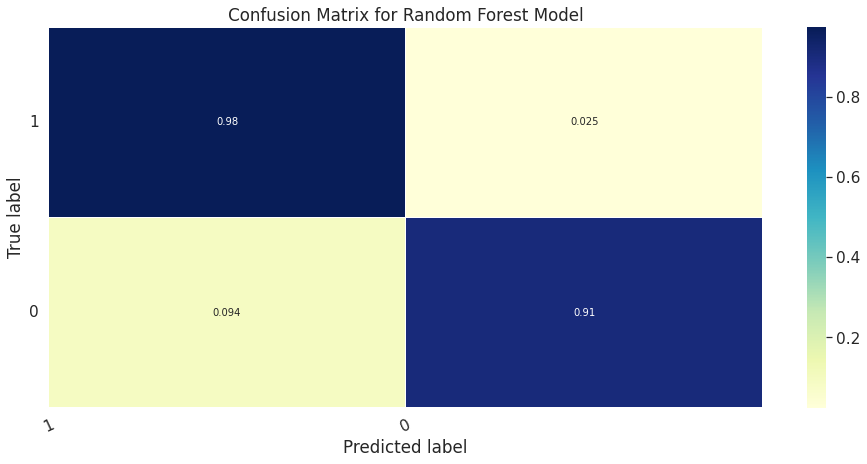

In [141]:
confusion_matrix(Y_test, Y_pred1)
matrix = confusion_matrix(Y_test, Y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.YlGnBu, linewidths=0.2)
# Add labels to the plot
class_names = [1,0]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [142]:
print("The precision score for the random forest model is:",precision_score(Y_test,Y_pred1))
print("The recall score for the random forest model is:",recall_score(Y_test,Y_pred1))

The precision score for the random forest model is: 0.964769647696477
The recall score for the random forest model is: 0.905852417302799


**LOGISTIC REGRESSION**

In [143]:
model_2 = LogisticRegression(max_iter=10000,multi_class="ovr")
model_2.fit(X_train,Y_train)
Y_pred2 = model_2.predict(X_test)

*ACCURACY, CONFUSION MATRIX, PRECISION, RECALL FOR LOGISTIC REGRESSION*

In [144]:
print("The accuracy of logistic regression model is:",accuracy_score(Y_test,Y_pred2))

The accuracy of logistic regression model is: 0.9196525515743756


In [145]:
print("The confusion matrix of logistic regression model is :\n",confusion_matrix(Y_test,Y_pred2))

The confusion matrix of logistic regression model is :
 [[496  32]
 [ 42 351]]


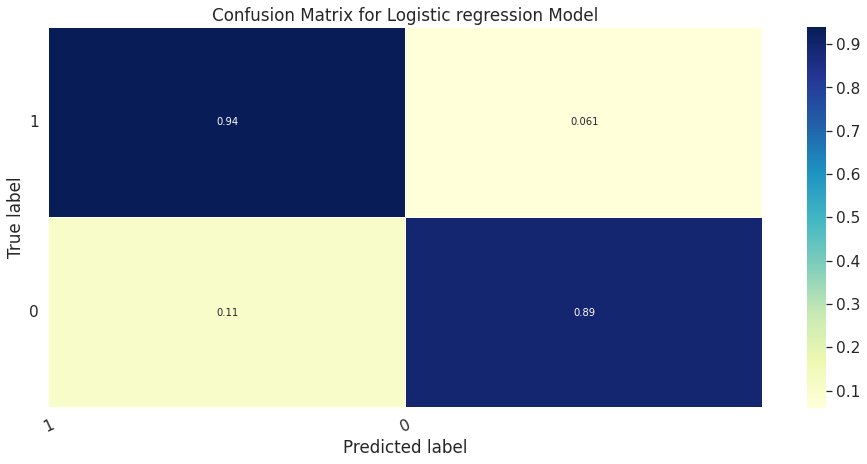

In [146]:
confusion_matrix(Y_test,Y_pred2)
matrix = confusion_matrix(Y_test,Y_pred2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.YlGnBu, linewidths=0.2)

# Add labels to the plot
class_names = [1,0]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic regression Model')
plt.show()

In [147]:
print("The recall score of the Logistic regression model is:",recall_score(Y_test,Y_pred2))
print("The Precision score of the Logistic regression model is:",precision_score(Y_test,Y_pred2))

The recall score of the Logistic regression model is: 0.8931297709923665
The Precision score of the Logistic regression model is: 0.9164490861618799


**SUPPORT VECTOR MACHINE**

In [148]:
model_3 = SVC(C=1.0, kernel='rbf')
model_3.fit(X_train,Y_train)
Y_pred3 = model_3.predict(X_test)

In [149]:
print("Accuracy of the SVM Model :",accuracy_score(Y_test, Y_pred3))

Accuracy of the SVM Model : 0.7133550488599348


In [150]:
print("The confusion matrix of SVM is :\n",confusion_matrix(Y_test,Y_pred3))

The confusion matrix of SVM is :
 [[484  44]
 [220 173]]


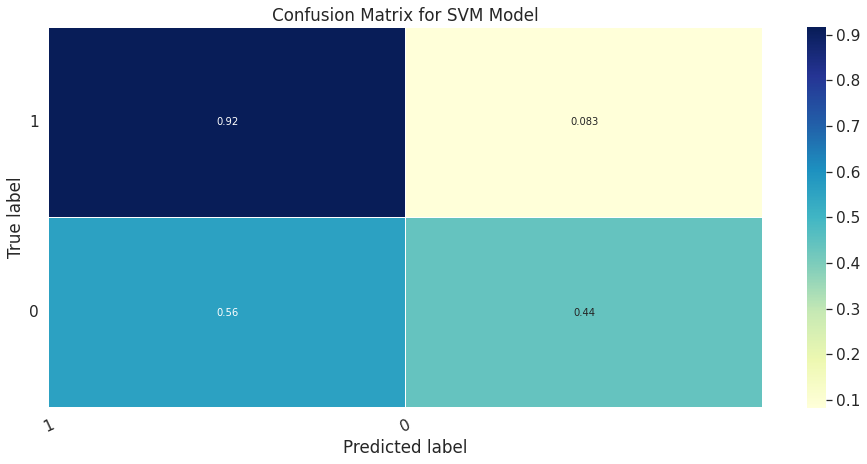

In [151]:
confusion_matrix(Y_test,Y_pred3)
matrix = confusion_matrix(Y_test,Y_pred3)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.YlGnBu, linewidths=0.2)

# Add labels to the plot
class_names = [1,0]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [152]:
print("The Precision score of the SVM is:",precision_score(Y_test, Y_pred3))
print("The recall score of the SVM is:",recall_score(Y_test, Y_pred3))

The Precision score of the SVM is: 0.7972350230414746
The recall score of the SVM is: 0.4402035623409669


 **NEURAL NETWORKS**

In [153]:
ann = tf.keras.models.Sequential()

In [154]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=120,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=60,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history=ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
115/115 [==============================] - 1s 1ms/step - loss: 2.5587 - accuracy: 0.7250
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.8611
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7678 - accuracy: 0.8500
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.8755
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.8753
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.9087
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.8880
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.8859
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.9238 - accuracy: 0.8690
Epoch 10/100
115/115 [==============================] - 0s 2ms/step - loss: 0.9074 - accura

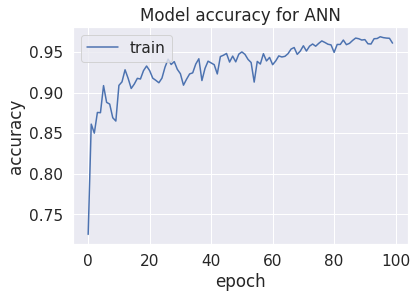

In [155]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy for ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [156]:
#Saving created neural network
ann.save("ANN.h5")

In [157]:
predict_x= ann.predict(X_test)
Y_pred4 = np.argmax(predict_x,axis=1)

In [158]:
cm=confusion_matrix(Y_test,Y_pred4)
print("The confusion matrix of Neural Network is:\n",cm)

The confusion matrix of Neural Network is:
 [[528   0]
 [393   0]]


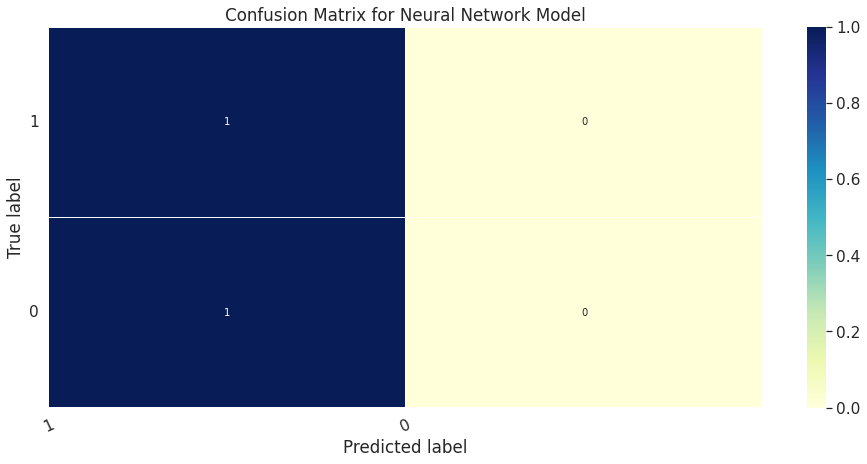

In [159]:
confusion_matrix(Y_test,Y_pred4)
matrix = confusion_matrix(Y_test,Y_pred4)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.YlGnBu, linewidths=0.2)
# Add labels to the plot
class_names = [1,0]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()

COMPARING THE ACCURACIES OF ALL 4 MODELS:

In [160]:
res_1 = accuracy_score(Y_test,Y_pred1)
res_2 = accuracy_score(Y_test,Y_pred2)
res_3 = accuracy_score(Y_test,Y_pred3)
res_4 = accuracy_score(Y_test,Y_pred4)
results = pd.DataFrame([["Random Forest",res_1],["Logistic regression",res_2],["SVM",res_3],["Neural Network",res_4]],columns=["Model","Accuracy"]) 
results

,Model,Accuracy
0,Random Forest,0.945711
1,Logistic regression,0.919653
2,SVM,0.713355
3,Neural Network,0.573290


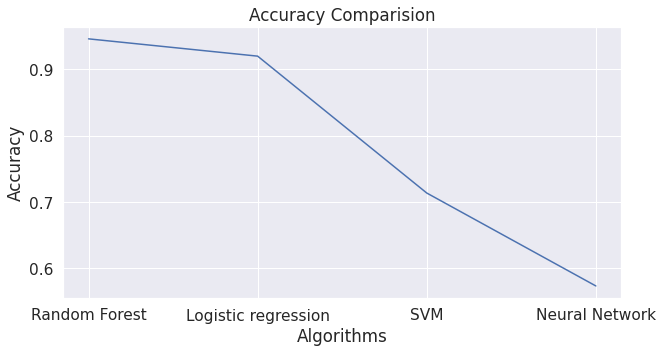

In [161]:
fig = plt.figure(figsize = (10, 5))
plt.plot(results.Model,results.Accuracy)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision')
plt.show()

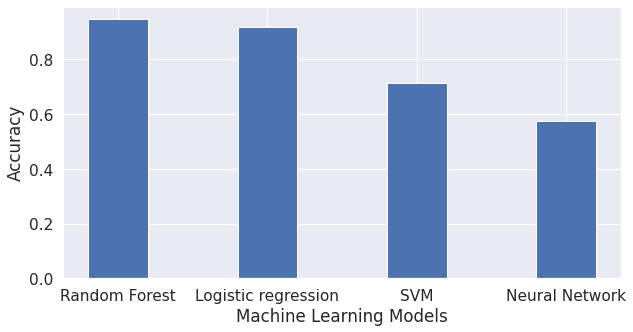

In [162]:
fig = plt.figure(figsize = (10, 5))
plt.bar(results.Model,results.Accuracy, width = 0.4)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.show()

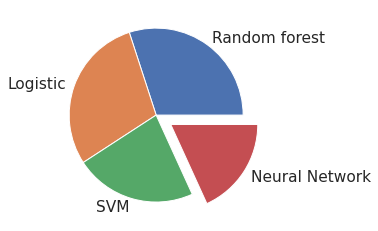

In [163]:
p= np.array(results.Accuracy)
mylabels = ["Random forest", "Logistic", "SVM", "Neural Network"]
myexplode = [0, 0, 0, 0.2]
plt.pie(p, labels = mylabels, explode = myexplode)
plt.show()